# Part II - Ford GoBike Bike Share System

## by Mark Okaba

## Investigation Overview


> In this investigation, We will attempt to decide whether or not Ford GoBike system is able to entice consumers. I'll look at the length of the journeys, the days with the most travels, and the hours with the most excursions. Then I'll look at the number of different user types, as well as the relationship between the customer's age and the trip durations, and lastly look at the relationship between the age and the trip duration for every user type  to actually respond to my questions

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
tripdata = pd.read_csv('201902-fordgobike-tripdata.csv')
# Make a copy of the df
clean_trip = tripdata.copy()
#deleting the null values
clean_df = clean_trip.dropna()
# Drop irrelevant columns
clean_df = clean_df.drop(columns=['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'])

# Convert wrong data types to correct data types: start_time,end_time, user_type, birth_year, member_gender, bike_share_for_all_trip

# convert user_type, member_gender, bike_share_for_all_trip, start_station_id, end_station_id
conv_dict = {'user_type': 'category',
                    'member_gender': 'category',
                    'bike_share_for_all_trip': 'category',
                    'start_station_id': 'category',
                    'end_station_id': 'category',
                    'member_birth_year': 'int64'}

# Convert the wrong data type with the dictionary
clean_df = clean_df.astype(conv_dict)

# Convert the start_time and end_time to datetime
clean_df['start_time'] = pd.to_datetime(clean_df['start_time'])
clean_df['end_time'] = pd.to_datetime(clean_df['end_time'])

#calculating the age of the users
clean_df['age'] = 2022 - clean_df['member_birth_year']

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trips Duration

> Duration has a thinner long tail distribution, with a lot trips occuring between the 400-800s mark when plotted on a log-scale. Interestingly, some of the trips took more than 2000s. The average trip, we can say took about 600s (3mins)

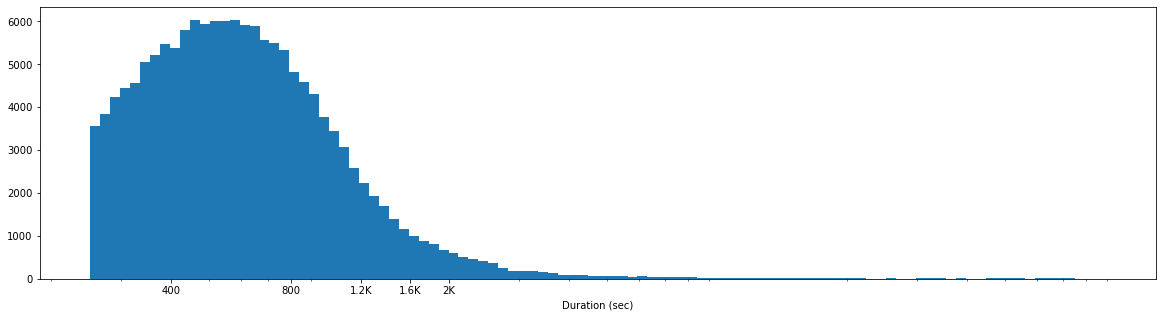

In [3]:
# The data distribution appears not to be a large spread. In order to get a better histogram showing the smaller part of the histogram we will do normalization.
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(clean_df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[20, 5])
plt.hist(data = clean_df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([400, 800, 1200, 1600, 2000], ['400', '800', '1.2K', '1.6K', '2K'])
plt.xlabel('Duration (sec)')
plt.show()

## Dsitribution of Trip Duration by Week Days

> Here we find that the highest number of trips were recorded on a Thursday

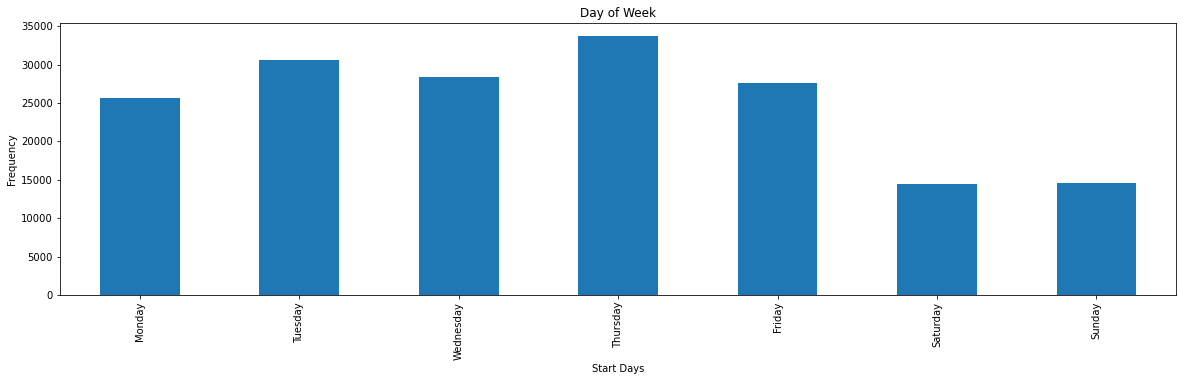

In [4]:
# What day of the week is the most popular start time?
plt.figure(figsize=[20, 5])
dayspplot = clean_df['start_time'].dt.dayofweek.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Start Days')
plt.ylabel('Frequency')
plt.title('Day of Week')
dayspplot.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

## Trip Distribution by Hours of the Day
> From the bar chart we can see that a lot of the trips took place after 6am. The highest trips were recorded at 8am and 5pm



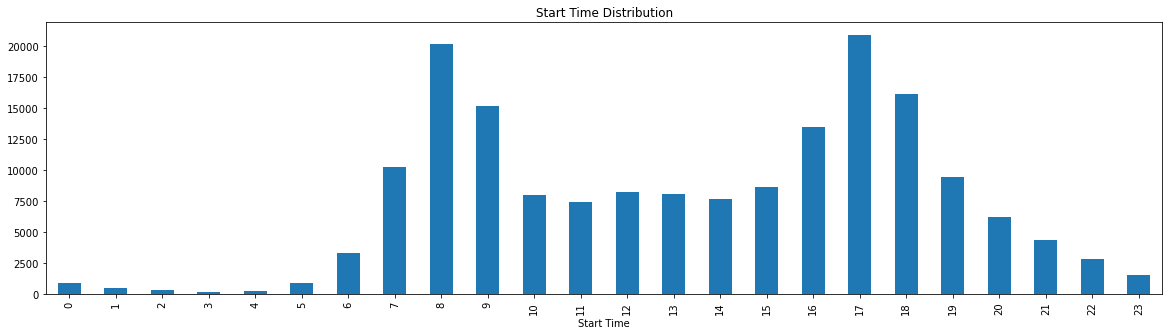

In [5]:
# What time of day is the most popular start time?
plt.figure(figsize=[20, 5])
clean_df['start_time'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Start Time')
plt.title('Start Time Distribution')
plt.show()

## Gender Distribution in the dataser
> We can as well see that for users' sex, more males partook in trips than females and others

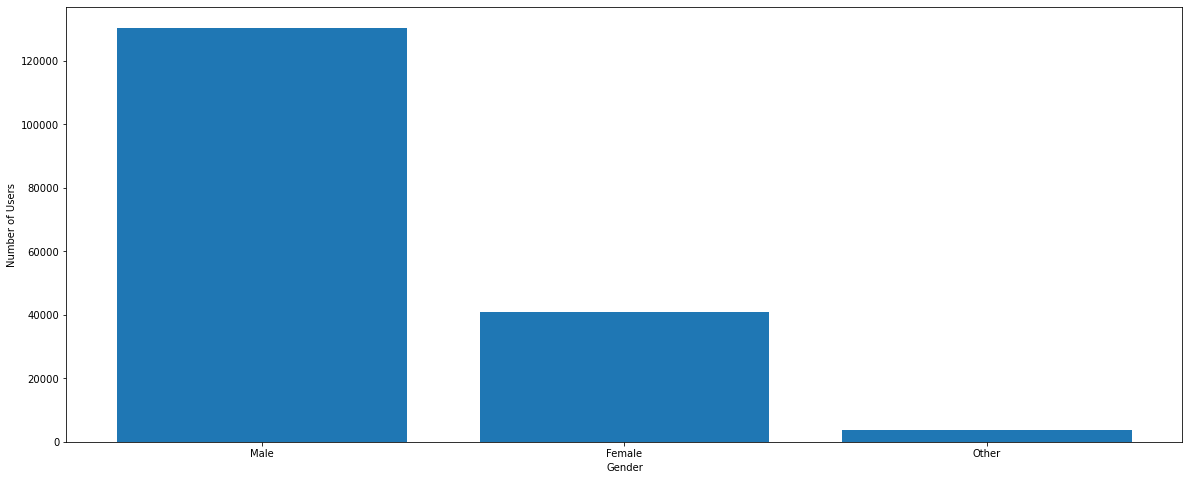

In [6]:
# plotting genders on bar.
plt.figure(figsize=[20,8])
plt.bar(x = clean_df.member_gender.value_counts().keys(), height = clean_df.member_gender.value_counts() )
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

## Total Users by Subscribers and Customers Category
> The highest numbers of users starting a trip at different locations seems to show that customers trumps subsrcibers for the top 10 highest stations

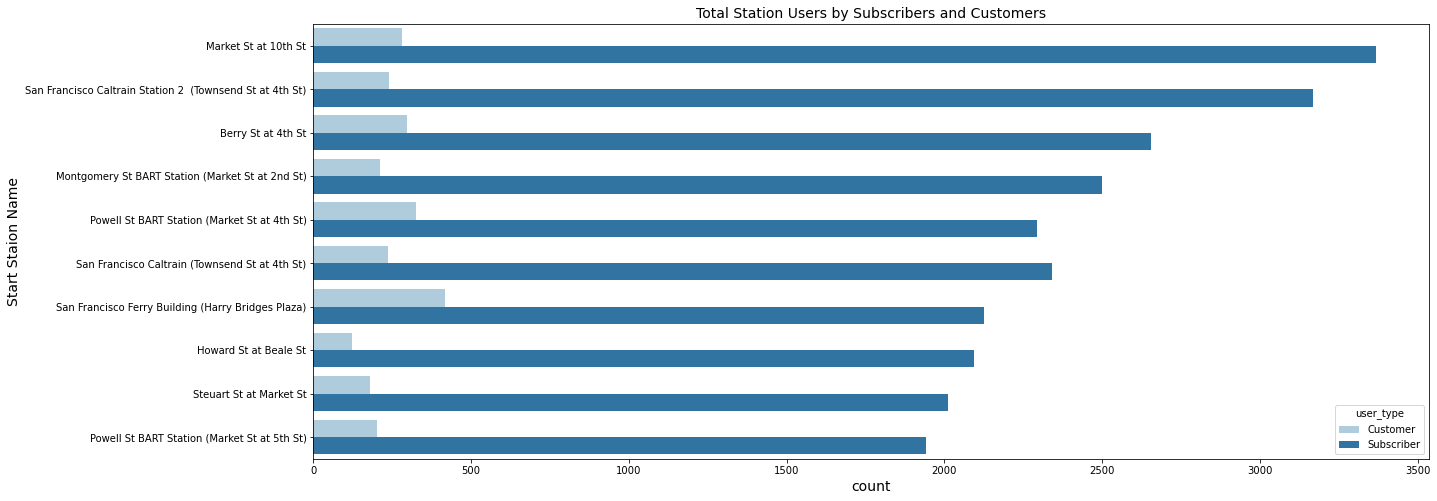

In [7]:
#The total number of users by subscribers and customers at the top stations
order = clean_df.start_station_name.value_counts().iloc[:10].index
plt.figure(figsize = (20,8))
sb.countplot(data = clean_df, y='start_station_name', order = order, hue = 'user_type', palette="Paired");
plt.xlabel('count', fontsize=14);
plt.ylabel('Start Staion Name', fontsize=14);
plt.title('Total Station Users by Subscribers and Customers', fontsize=14);

## Age vs Duration per User Type
> We find the scatter plot representing the argument that younger people engage in longer rides, albeit in terms of user categories we see most of the trips being the subscriber base. Hence, we deduce that younger customers engaged in longer more active rides than subscribers

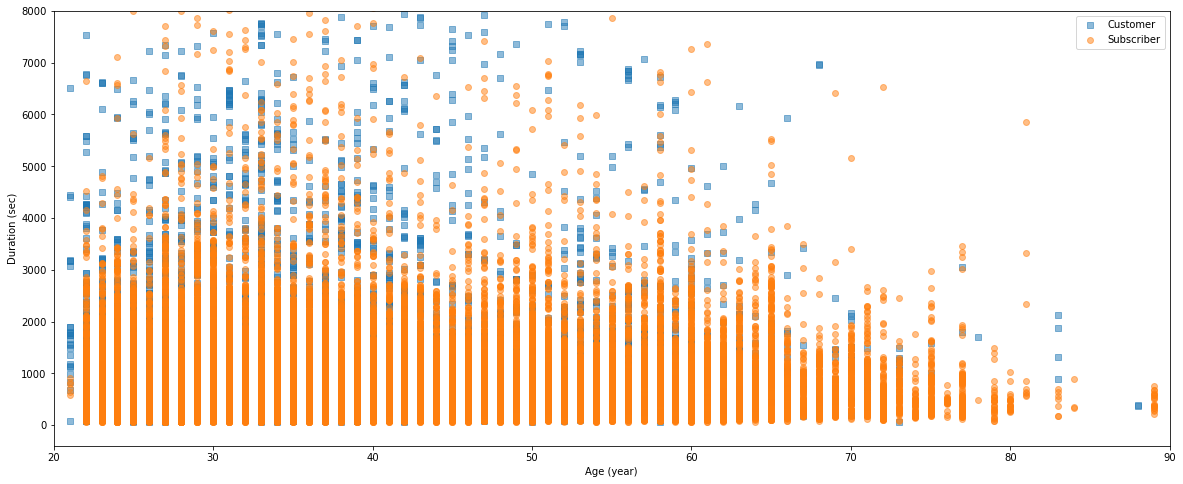

In [8]:
user_type_markers = [['Customer', 's'],['Subscriber', 'o']]
plt.figure(figsize = (20,8))
for utype, marker in user_type_markers:
    df_utype = clean_df[clean_df['user_type'] == utype]
    plt.scatter((2022 - df_utype['member_birth_year']), df_utype['duration_sec'], marker = marker, alpha=0.5)
plt.legend(['Customer','Subscriber'])
plt.axis([20, 90, -400, 8000 ])
plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 825379 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
tcgetpgrp failed: Not a tty


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 